In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

### config

In [2]:
%matplotlib notebook
#%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", reshape=False, one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


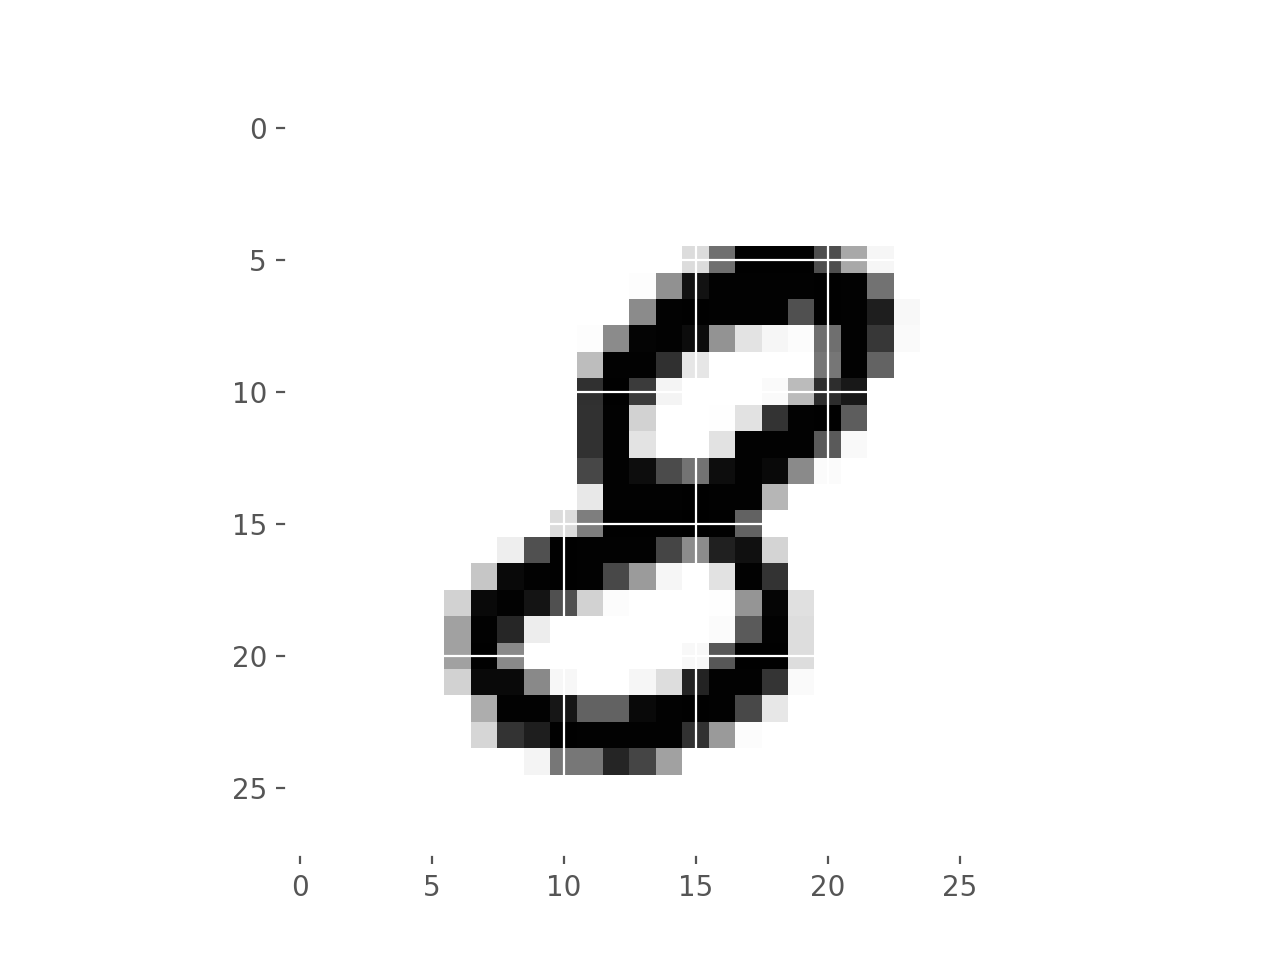

In [6]:
plt.imshow(mnist.train.images[5].reshape(28,28), cmap='Greys', interpolation=None)

In [7]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [5]:
mnist.train.next_batch(10)

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [12]:
# variables - degrees of freedom of your code - all the things that you want tensorflow to determine for you
# placeholder - where data goes

In [6]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [9]:
W = tf.Variable(tf.zeros([784,10])) # Weights per node
b = tf.Variable(tf.zeros([10])) # biases

In [10]:
# model
XX = tf.reshape(X, [-1, 784])
Y = tf.nn.softmax(tf.matmul(XX, W) + b) #reshape to flatten images
# The tf.reshape command transforms our 28x28 images into single vectors of 784 pixels. The "-1" in the reshape command means "computer, figure it out, there is only one possibility". In practice it will be the number of images in a mini-batch.

In [11]:
# loss function
cross_entropy = -tf.reduce_mean(Y_ * tf.log(Y)) * 1000

In [11]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
# training
learn_rate = 0.003
optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [14]:
# need to initialize and start a session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
#allweights = tf.reshape(W, [-1])
#allbiases = tf.reshape(b, [-1])
#I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)  # assembles 10x10 images by default
#It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)  # 1000 images on 25 lines

In [16]:
acc_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])

In [16]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        #datavis.append_training_curves_data(i, a, c)
        #datavis.append_data_histograms(i, w, b)
        #datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        #datavis.append_test_curves_data(i, a, c)
        #datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [18]:
for i in range(2000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.1 loss: 230.25854
0: ********* epoch 1 ********* test accuracy:0.098 test loss: 230.25717
10: accuracy:0.82 loss: 95.99215
20: accuracy:0.8 loss: 80.97864
30: accuracy:0.86 loss: 74.33287
40: accuracy:0.9 loss: 59.21507
50: accuracy:0.88 loss: 45.272335
50: ********* epoch 1 ********* test accuracy:0.8702 test loss: 52.185997
60: accuracy:0.89 loss: 47.656506
70: accuracy:0.85 loss: 52.878464
80: accuracy:0.84 loss: 49.804085
90: accuracy:0.88 loss: 44.050556
100: accuracy:0.87 loss: 49.11692
100: ********* epoch 1 ********* test accuracy:0.8899 test loss: 42.4879
110: accuracy:0.85 loss: 52.35508
120: accuracy:0.86 loss: 49.162304
130: accuracy:0.89 loss: 35.22904
140: accuracy:0.88 loss: 43.960793
150: accuracy:0.88 loss: 49.43249
150: ********* epoch 1 ********* test accuracy:0.8973 test loss: 38.74926
160: accuracy:0.91 loss: 33.923767
170: accuracy:0.9 loss: 32.225426
180: accuracy:0.85 loss: 52.7489
190: accuracy:0.87 loss: 45.63749
200: accuracy:0.91 loss: 36.34014

1700: accuracy:0.94 loss: 17.808975
1700: ********* epoch 4 ********* test accuracy:0.9191 test loss: 29.023727
1710: accuracy:0.93 loss: 23.223864
1720: accuracy:0.95 loss: 25.079773
1730: accuracy:0.93 loss: 20.232887
1740: accuracy:0.94 loss: 25.100601
1750: accuracy:0.92 loss: 24.241203
1750: ********* epoch 4 ********* test accuracy:0.9196 test loss: 29.147503
1760: accuracy:0.93 loss: 45.624382
1770: accuracy:0.92 loss: 29.39049
1780: accuracy:0.93 loss: 29.863705
1790: accuracy:0.88 loss: 28.785627
1800: accuracy:0.92 loss: 30.237734
1800: ********* epoch 4 ********* test accuracy:0.9192 test loss: 28.197222
1810: accuracy:0.93 loss: 31.468681
1820: accuracy:0.89 loss: 33.009384
1830: accuracy:0.88 loss: 28.527218
1840: accuracy:0.94 loss: 18.711771
1850: accuracy:0.94 loss: 24.791733
1850: ********* epoch 4 ********* test accuracy:0.9216 test loss: 28.528847
1860: accuracy:0.88 loss: 44.369904
1870: accuracy:0.9 loss: 28.548409
1880: accuracy:0.93 loss: 31.002426
1890: accuracy

<IPython.core.display.Javascript object>


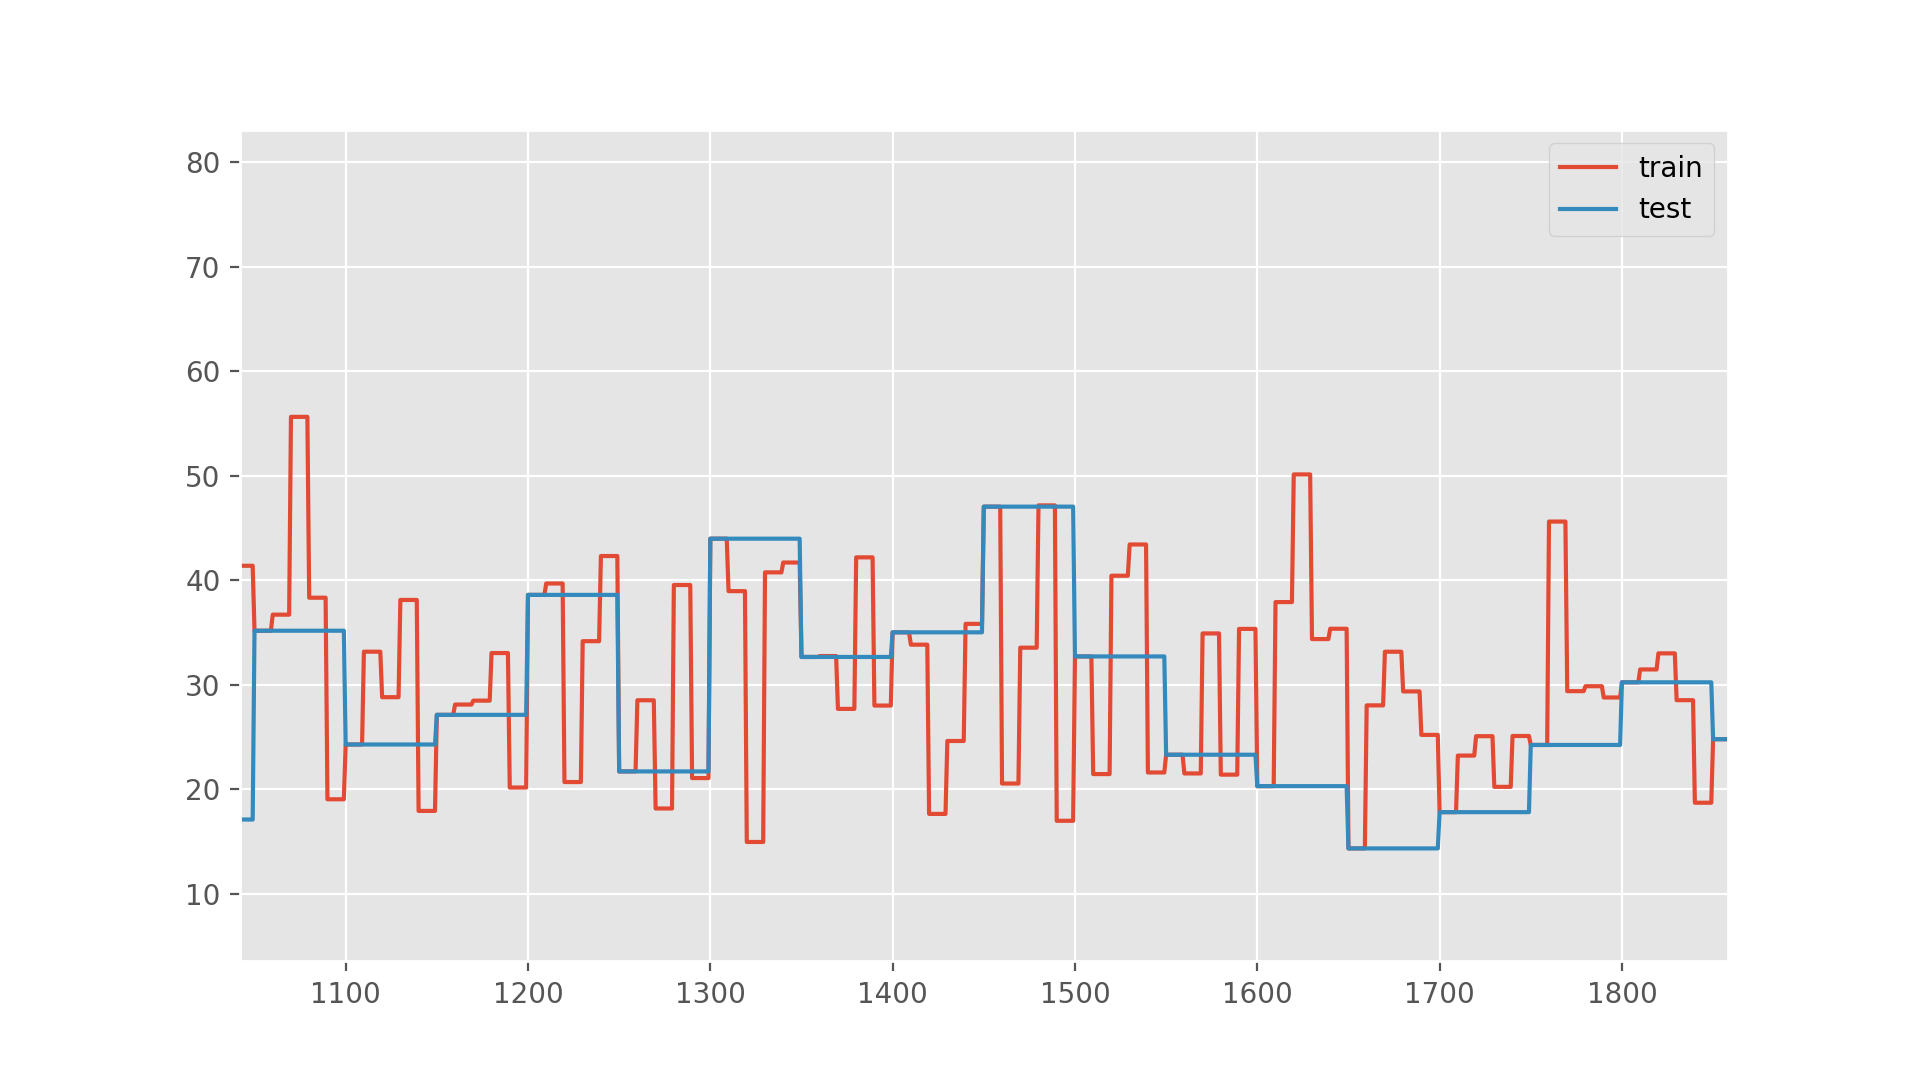

In [19]:
loss_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

<IPython.core.display.Javascript object>


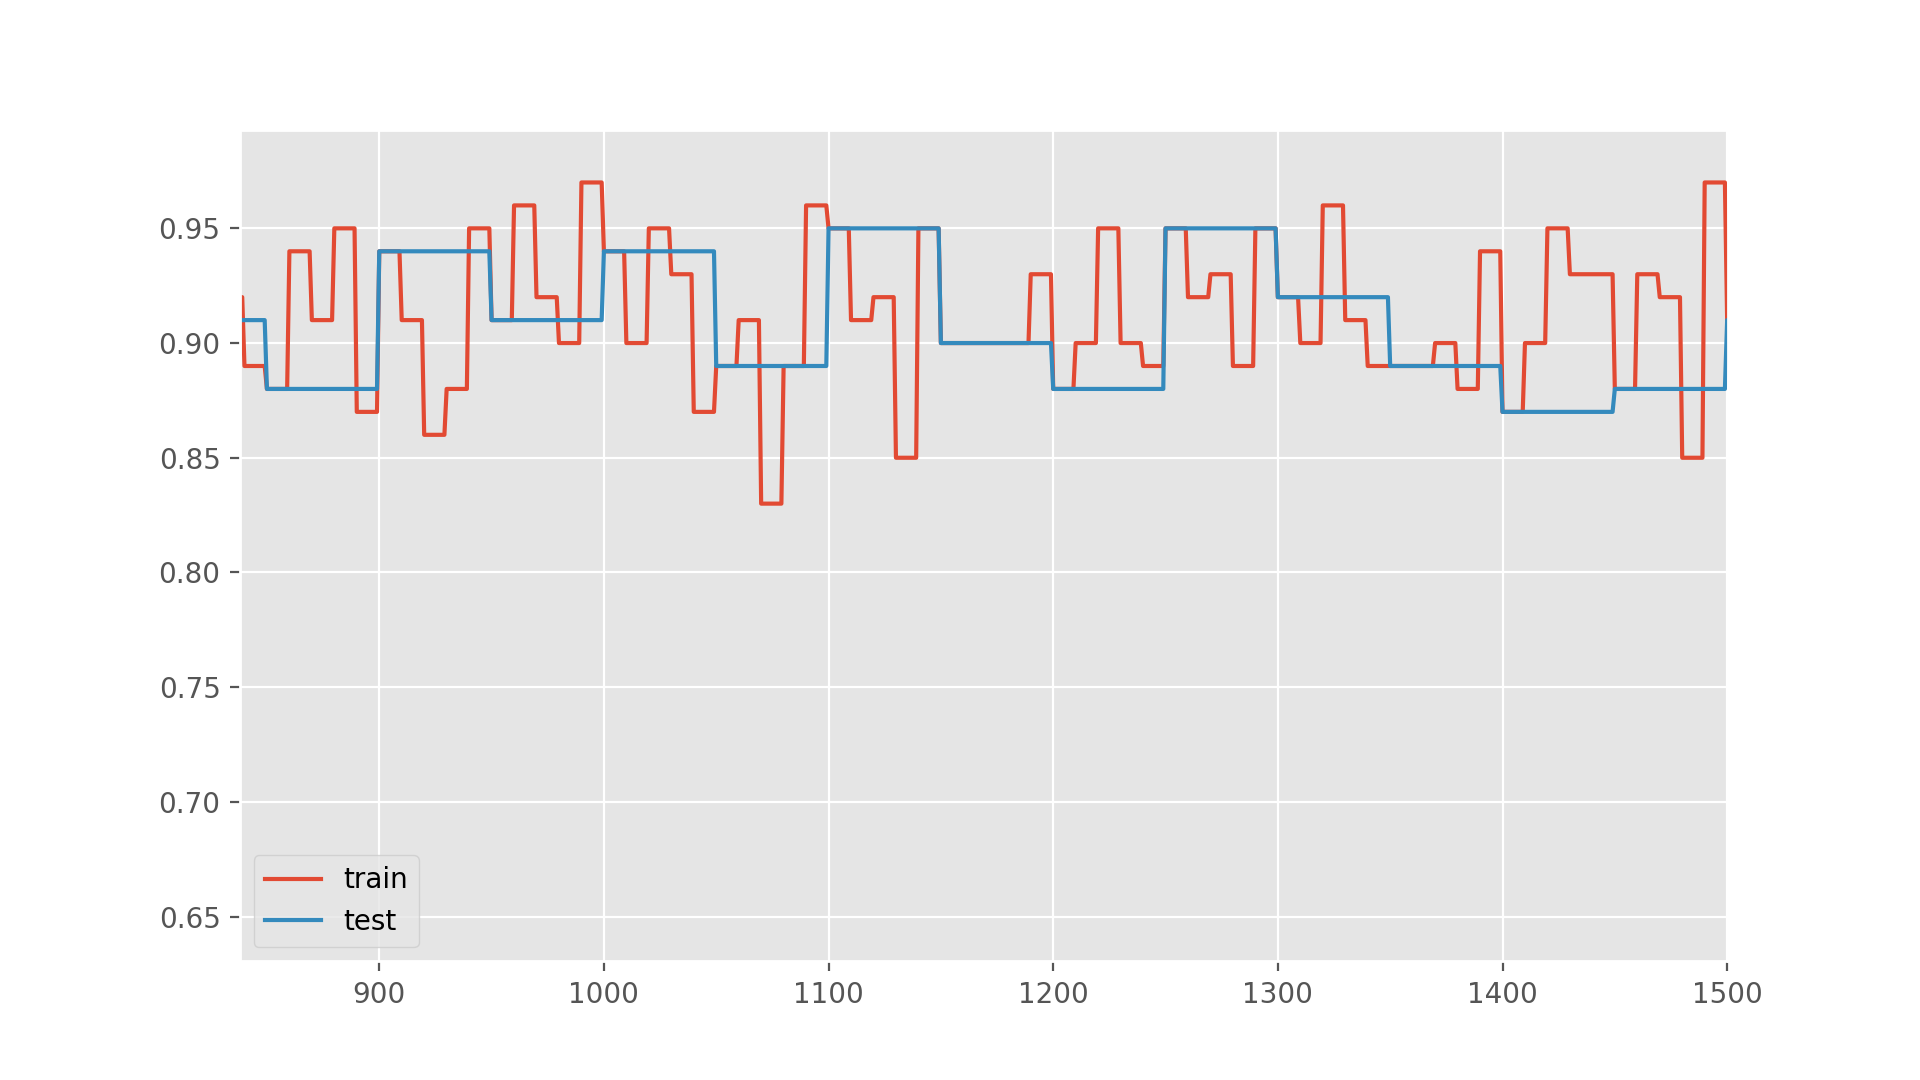

In [20]:
acc_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

In [23]:
# maximum test accuracy
acc_plot_df.test.mean()

0.8870731732103883

In [26]:
# sess.run() runs the specified operations in the graph
for i in tqdm(range(1000)):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X: batch_X, Y_: batch_Y} # X and Y_ are what we previously defined as placeholders
    
    # train
    sess.run(train_step, feed_dict = train_data)
    
    # success ?
    a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    print(c)
    
    # do this every hundred iterations
    
    # success on test_data
    test_data = {X: mnist.test.images, Y_: mnist.test.labels}
    a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)

  0%|          | 3/1000 [00:00<00:41, 24.19it/s]

nan
nan
nan
nan
nan


  1%|▏         | 14/1000 [00:00<00:31, 31.46it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


  2%|▏         | 23/1000 [00:00<00:27, 35.50it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


  3%|▎         | 28/1000 [00:00<00:26, 36.19it/s]

nan
nan
nan
nan
nan
nan
nan
nan


  4%|▎         | 36/1000 [00:01<00:27, 35.48it/s]

nan
nan
nan
nan
nan
nan


  4%|▍         | 40/1000 [00:01<00:28, 34.10it/s]

nan
nan
nan
nan
nan
nan
nan


  5%|▍         | 48/1000 [00:01<00:29, 32.29it/s]

nan
nan
nan
nan
nan
nan


  5%|▌         | 54/1000 [00:01<00:29, 31.64it/s]

nan
nan
nan
nan
nan
nan


  6%|▌         | 62/1000 [00:01<00:29, 31.88it/s]

nan
nan
nan
nan
nan
nan
nan
nan


  7%|▋         | 66/1000 [00:02<00:29, 31.73it/s]

nan
nan
nan
nan
nan
nan


  8%|▊         | 75/1000 [00:02<00:28, 32.12it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


  8%|▊         | 84/1000 [00:02<00:28, 32.43it/s]

nan
nan
nan
nan
nan


  9%|▉         | 88/1000 [00:02<00:28, 31.91it/s]

nan
nan
nan
nan
nan
nan


 10%|▉         | 96/1000 [00:03<00:28, 31.77it/s]

nan
nan
nan
nan
nan
nan
nan


 10%|█         | 104/1000 [00:03<00:28, 31.55it/s]

nan
nan
nan
nan
nan
nan
nan


 11%|█         | 109/1000 [00:03<00:27, 31.84it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 12%|█▏        | 118/1000 [00:03<00:27, 31.94it/s]

nan
nan
nan
nan
nan
nan


 12%|█▏        | 122/1000 [00:03<00:27, 31.42it/s]

nan
nan
nan
nan
nan


 13%|█▎        | 129/1000 [00:04<00:27, 31.27it/s]

nan
nan
nan
nan
nan
nan
nan

 14%|█▎        | 137/1000 [00:04<00:27, 31.46it/s]


nan
nan
nan
nan
nan
nan
nan
nan


 15%|█▍        | 148/1000 [00:04<00:26, 32.45it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 15%|█▌        | 153/1000 [00:04<00:26, 32.18it/s]

nan
nan
nan
nan
nan


 16%|█▌        | 162/1000 [00:05<00:25, 32.30it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 17%|█▋        | 172/1000 [00:05<00:25, 32.52it/s]

nan
nan
nan
nan
nan
nan
nan


 18%|█▊        | 180/1000 [00:05<00:25, 32.54it/s]

nan
nan
nan
nan
nan
nan
nan


 18%|█▊        | 185/1000 [00:05<00:24, 32.78it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 20%|█▉        | 196/1000 [00:05<00:24, 33.45it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 21%|██▏       | 213/1000 [00:06<00:22, 34.51it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 22%|██▏       | 219/1000 [00:06<00:22, 34.36it/s]

nan
nan
nan
nan
nan
nan


 22%|██▏       | 224/1000 [00:06<00:22, 34.07it/s]

nan
nan
nan
nan
nan
nan


 23%|██▎       | 228/1000 [00:06<00:22, 33.85it/s]

nan
nan
nan
nan
nan


 23%|██▎       | 232/1000 [00:06<00:22, 33.54it/s]

nan
nan
nan
nan
nan


 24%|██▍       | 240/1000 [00:07<00:22, 33.43it/s]

nan
nan
nan
nan
nan
nan
nan


 24%|██▍       | 244/1000 [00:07<00:22, 33.33it/s]

nan
nan
nan
nan
nan
nan


 25%|██▌       | 251/1000 [00:07<00:22, 33.02it/s]

nan
nan
nan
nan
nan
nan


 26%|██▌       | 257/1000 [00:07<00:22, 32.83it/s]

nan
nan
nan
nan
nan
nan


 26%|██▋       | 263/1000 [00:08<00:22, 32.67it/s]

nan
nan
nan
nan
nan
nan


 27%|██▋       | 270/1000 [00:08<00:22, 32.60it/s]

nan
nan
nan
nan
nan
nan
nan


 28%|██▊       | 277/1000 [00:08<00:22, 32.49it/s]

nan
nan
nan
nan
nan
nan


 28%|██▊       | 283/1000 [00:08<00:22, 32.23it/s]

nan
nan
nan
nan
nan
nan


 29%|██▉       | 291/1000 [00:09<00:22, 32.14it/s]

nan
nan
nan
nan
nan
nan


 29%|██▉       | 294/1000 [00:09<00:22, 32.02it/s]

nan
nan
nan
nan
nan
nan


 30%|███       | 300/1000 [00:09<00:22, 31.13it/s]

nan
nan
nan
nan
nan
nan


 31%|███       | 307/1000 [00:09<00:22, 31.03it/s]

nan
nan
nan
nan
nan
nan
nan


 32%|███▏      | 319/1000 [00:10<00:21, 31.25it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 33%|███▎      | 329/1000 [00:10<00:21, 31.60it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 33%|███▎      | 334/1000 [00:10<00:21, 31.60it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 34%|███▍      | 344/1000 [00:10<00:20, 31.91it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 35%|███▌      | 354/1000 [00:11<00:20, 32.03it/s]

nan
nan
nan
nan
nan
nan
nan


 36%|███▌      | 358/1000 [00:11<00:20, 31.99it/s]

nan
nan
nan
nan
nan
nan


 37%|███▋      | 367/1000 [00:11<00:19, 32.10it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 38%|███▊      | 379/1000 [00:11<00:19, 32.49it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 38%|███▊      | 385/1000 [00:11<00:18, 32.68it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 40%|███▉      | 395/1000 [00:12<00:18, 32.65it/s]

nan
nan
nan
nan
nan
nan


 40%|███▉      | 399/1000 [00:12<00:18, 32.63it/s]

nan
nan
nan
nan
nan
nan


 41%|████      | 407/1000 [00:12<00:18, 32.53it/s]

nan
nan
nan
nan
nan
nan


 41%|████      | 411/1000 [00:12<00:18, 32.50it/s]

nan
nan
nan
nan
nan
nan
nan


 42%|████▏     | 419/1000 [00:12<00:17, 32.50it/s]

nan
nan
nan
nan
nan
nan
nan


 43%|████▎     | 427/1000 [00:13<00:17, 32.57it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 44%|████▎     | 435/1000 [00:13<00:17, 32.62it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 44%|████▍     | 444/1000 [00:13<00:16, 32.71it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 45%|████▌     | 453/1000 [00:13<00:16, 32.80it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 46%|████▋     | 463/1000 [00:14<00:16, 32.95it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 47%|████▋     | 467/1000 [00:14<00:16, 32.91it/s]

nan
nan
nan
nan
nan
nan
nan


 48%|████▊     | 475/1000 [00:14<00:16, 32.76it/s]

nan
nan
nan
nan
nan


 48%|████▊     | 479/1000 [00:14<00:15, 32.71it/s]

nan
nan
nan
nan
nan
nan
nan


 49%|████▊     | 487/1000 [00:14<00:15, 32.69it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 50%|████▉     | 496/1000 [00:15<00:15, 32.75it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 51%|█████     | 508/1000 [00:15<00:14, 33.08it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 52%|█████▏    | 520/1000 [00:15<00:14, 33.40it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 53%|█████▎    | 532/1000 [00:15<00:13, 33.67it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 54%|█████▍    | 538/1000 [00:15<00:13, 33.72it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 55%|█████▍    | 548/1000 [00:16<00:13, 33.79it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 56%|█████▌    | 558/1000 [00:16<00:13, 33.96it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 56%|█████▋    | 563/1000 [00:16<00:12, 33.99it/s]

nan
nan
nan
nan
nan
nan


 57%|█████▋    | 572/1000 [00:16<00:12, 33.87it/s]

nan
nan
nan
nan
nan
nan
nan


 58%|█████▊    | 580/1000 [00:17<00:12, 33.83it/s]

nan
nan
nan
nan
nan
nan
nan


 59%|█████▉    | 590/1000 [00:17<00:12, 34.01it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 60%|██████    | 603/1000 [00:17<00:11, 34.32it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 62%|██████▏   | 616/1000 [00:17<00:11, 34.62it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 62%|██████▏   | 622/1000 [00:17<00:10, 34.73it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 63%|██████▎   | 633/1000 [00:18<00:10, 34.63it/s]

nan
nan
nan
nan
nan


 64%|██████▍   | 638/1000 [00:18<00:10, 34.58it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 65%|██████▍   | 649/1000 [00:18<00:10, 34.79it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 66%|██████▌   | 660/1000 [00:18<00:09, 34.98it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 67%|██████▋   | 671/1000 [00:19<00:09, 35.16it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 68%|██████▊   | 677/1000 [00:19<00:09, 35.13it/s]

nan
nan
nan
nan
nan
nan


 69%|██████▉   | 688/1000 [00:19<00:08, 35.16it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 70%|██████▉   | 699/1000 [00:19<00:08, 35.35it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 71%|███████   | 711/1000 [00:19<00:08, 35.57it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 72%|███████▏  | 723/1000 [00:20<00:07, 35.78it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 74%|███████▎  | 735/1000 [00:20<00:07, 35.99it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 74%|███████▍  | 741/1000 [00:20<00:07, 36.08it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 75%|███████▍  | 747/1000 [00:20<00:07, 36.02it/s]

nan
nan
nan
nan
nan
nan


 76%|███████▌  | 757/1000 [00:21<00:06, 35.97it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 76%|███████▌  | 762/1000 [00:21<00:06, 35.93it/s]

nan
nan
nan
nan
nan
nan
nan


 77%|███████▋  | 770/1000 [00:21<00:06, 35.84it/s]

nan
nan
nan
nan
nan
nan


 77%|███████▋  | 774/1000 [00:21<00:06, 35.77it/s]

nan
nan
nan
nan
nan
nan


 78%|███████▊  | 781/1000 [00:21<00:06, 35.63it/s]

nan
nan
nan
nan
nan


 79%|███████▉  | 788/1000 [00:22<00:05, 35.58it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 80%|███████▉  | 797/1000 [00:22<00:05, 35.61it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 80%|████████  | 801/1000 [00:22<00:05, 35.57it/s]

nan
nan
nan
nan
nan
nan


 81%|████████  | 809/1000 [00:22<00:05, 35.51it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 82%|████████▏ | 821/1000 [00:22<00:05, 35.70it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 83%|████████▎ | 834/1000 [00:23<00:04, 35.92it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 84%|████████▍ | 840/1000 [00:23<00:04, 36.00it/s]

nan
nan
nan
nan
nan
nan
nan


 85%|████████▍ | 846/1000 [00:23<00:04, 35.97it/s]

nan


 85%|████████▌ | 851/1000 [00:23<00:04, 35.62it/s]

nan
nan
nan
nan
nan
nan


 86%|████████▌ | 855/1000 [00:24<00:04, 35.57it/s]

nan
nan
nan
nan
nan
nan


 86%|████████▋ | 863/1000 [00:24<00:03, 35.48it/s]

nan
nan
nan
nan
nan
nan
nan


 87%|████████▋ | 870/1000 [00:24<00:03, 35.35it/s]

nan
nan
nan
nan
nan
nan


 88%|████████▊ | 878/1000 [00:24<00:03, 35.30it/s]

nan
nan
nan
nan
nan
nan
nan


 88%|████████▊ | 884/1000 [00:25<00:03, 35.23it/s]

nan
nan
nan
nan
nan


 89%|████████▊ | 887/1000 [00:25<00:03, 35.17it/s]

nan
nan
nan
nan
nan
nan


 90%|████████▉ | 895/1000 [00:25<00:02, 35.18it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 90%|█████████ | 905/1000 [00:25<00:02, 35.29it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 92%|█████████▏| 917/1000 [00:25<00:02, 35.47it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 93%|█████████▎| 930/1000 [00:26<00:01, 35.66it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 94%|█████████▍| 943/1000 [00:26<00:01, 35.85it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 96%|█████████▌| 956/1000 [00:26<00:01, 36.04it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


 96%|█████████▌| 962/1000 [00:26<00:01, 36.07it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 97%|█████████▋| 973/1000 [00:26<00:00, 36.10it/s]

nan
nan
nan
nan
nan
nan
nan
nan


 98%|█████████▊| 983/1000 [00:27<00:00, 36.12it/s]

nan
nan
nan
nan
nan
nan
nan
nan
nan


 99%|█████████▉| 988/1000 [00:27<00:00, 36.13it/s]

nan
nan
nan
nan
nan
nan
nan
nan


100%|██████████| 1000/1000 [00:27<00:00, 36.17it/s]

nan
nan
nan
nan
nan
nan
nan


## Go deep - add more layers

In [7]:
K, L, M, N = 200, 100, 60, 30

In [11]:
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev

In [12]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) #weights initialized with random values
B2 = tf.Variable(tf.zeros([L]))

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # truncated normal in this case is same as random initialization
B3 = tf.Variable(tf.zeros([M]))

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.zeros([N]))

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

## initialisation with Relu - use tf.ones for biases

In [9]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1 = tf.Variable(tf.ones([K])/10)

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) #weights initialized with random values
B2 = tf.Variable(tf.zeros([L])/10)

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # truncated normal in this case is same as random initialization
B3 = tf.Variable(tf.zeros([M])/10)

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.zeros([N])/10)

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [174]:
# new model
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

## try relu because stuck at 0.1 accuracy

In [10]:
# new model
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [12]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [142]:
# training
learn_rate = 0.003
optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [13]:
# training
learn_rate = 0.003
optimizer = tf.train.AdamOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [14]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [17]:
acc_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])

for i in range(2000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.13 loss: 229.50589
0: ********* epoch 1 ********* test accuracy:0.1212 test loss: 230.40102
10: accuracy:0.54 loss: 151.87627
20: accuracy:0.87 loss: 59.331554
30: accuracy:0.75 loss: 88.63399
40: accuracy:0.87 loss: 41.852753
50: accuracy:0.88 loss: 40.63812
50: ********* epoch 1 ********* test accuracy:0.877 test loss: 42.924057
60: accuracy:0.85 loss: 42.666096
70: accuracy:0.9 loss: 23.511417
80: accuracy:0.97 loss: 22.237106
90: accuracy:0.88 loss: 30.40727
100: accuracy:0.89 loss: 24.60239
100: ********* epoch 1 ********* test accuracy:0.9057 test loss: 30.378183
110: accuracy:0.91 loss: 43.63761
120: accuracy:0.94 loss: 16.273418
130: accuracy:0.94 loss: 21.775234
140: accuracy:0.95 loss: 13.668583
150: accuracy:0.93 loss: 23.694138
150: ********* epoch 1 ********* test accuracy:0.9256 test loss: 25.228289
160: accuracy:0.94 loss: 21.68085
170: accuracy:0.89 loss: 40.512955
180: accuracy:0.93 loss: 18.852213
190: accuracy:0.93 loss: 15.058035
200: accuracy:0.92 los

1650: accuracy:0.99 loss: 4.1454606
1650: ********* epoch 4 ********* test accuracy:0.9719 test loss: 10.142477
1660: accuracy:0.98 loss: 6.579957
1670: accuracy:0.98 loss: 3.2092175
1680: accuracy:0.96 loss: 8.68656
1690: accuracy:0.97 loss: 5.818673
1700: accuracy:1.0 loss: 1.4129956
1700: ********* epoch 4 ********* test accuracy:0.9717 test loss: 11.036551
1710: accuracy:0.99 loss: 5.2997913
1720: accuracy:0.95 loss: 12.434185
1730: accuracy:1.0 loss: 0.931338
1740: accuracy:0.99 loss: 3.5336056
1750: accuracy:0.98 loss: 6.6217937
1750: ********* epoch 4 ********* test accuracy:0.9728 test loss: 9.894645
1760: accuracy:1.0 loss: 2.053581
1770: accuracy:0.98 loss: 7.88612
1780: accuracy:0.99 loss: 6.9022374
1790: accuracy:0.97 loss: 15.8756
1800: accuracy:0.98 loss: 6.962075
1800: ********* epoch 4 ********* test accuracy:0.9693 test loss: 10.833449
1810: accuracy:0.99 loss: 2.597141
1820: accuracy:0.97 loss: 5.351123
1830: accuracy:0.99 loss: 3.2753303
1840: accuracy:0.98 loss: 4.4

<IPython.core.display.Javascript object>


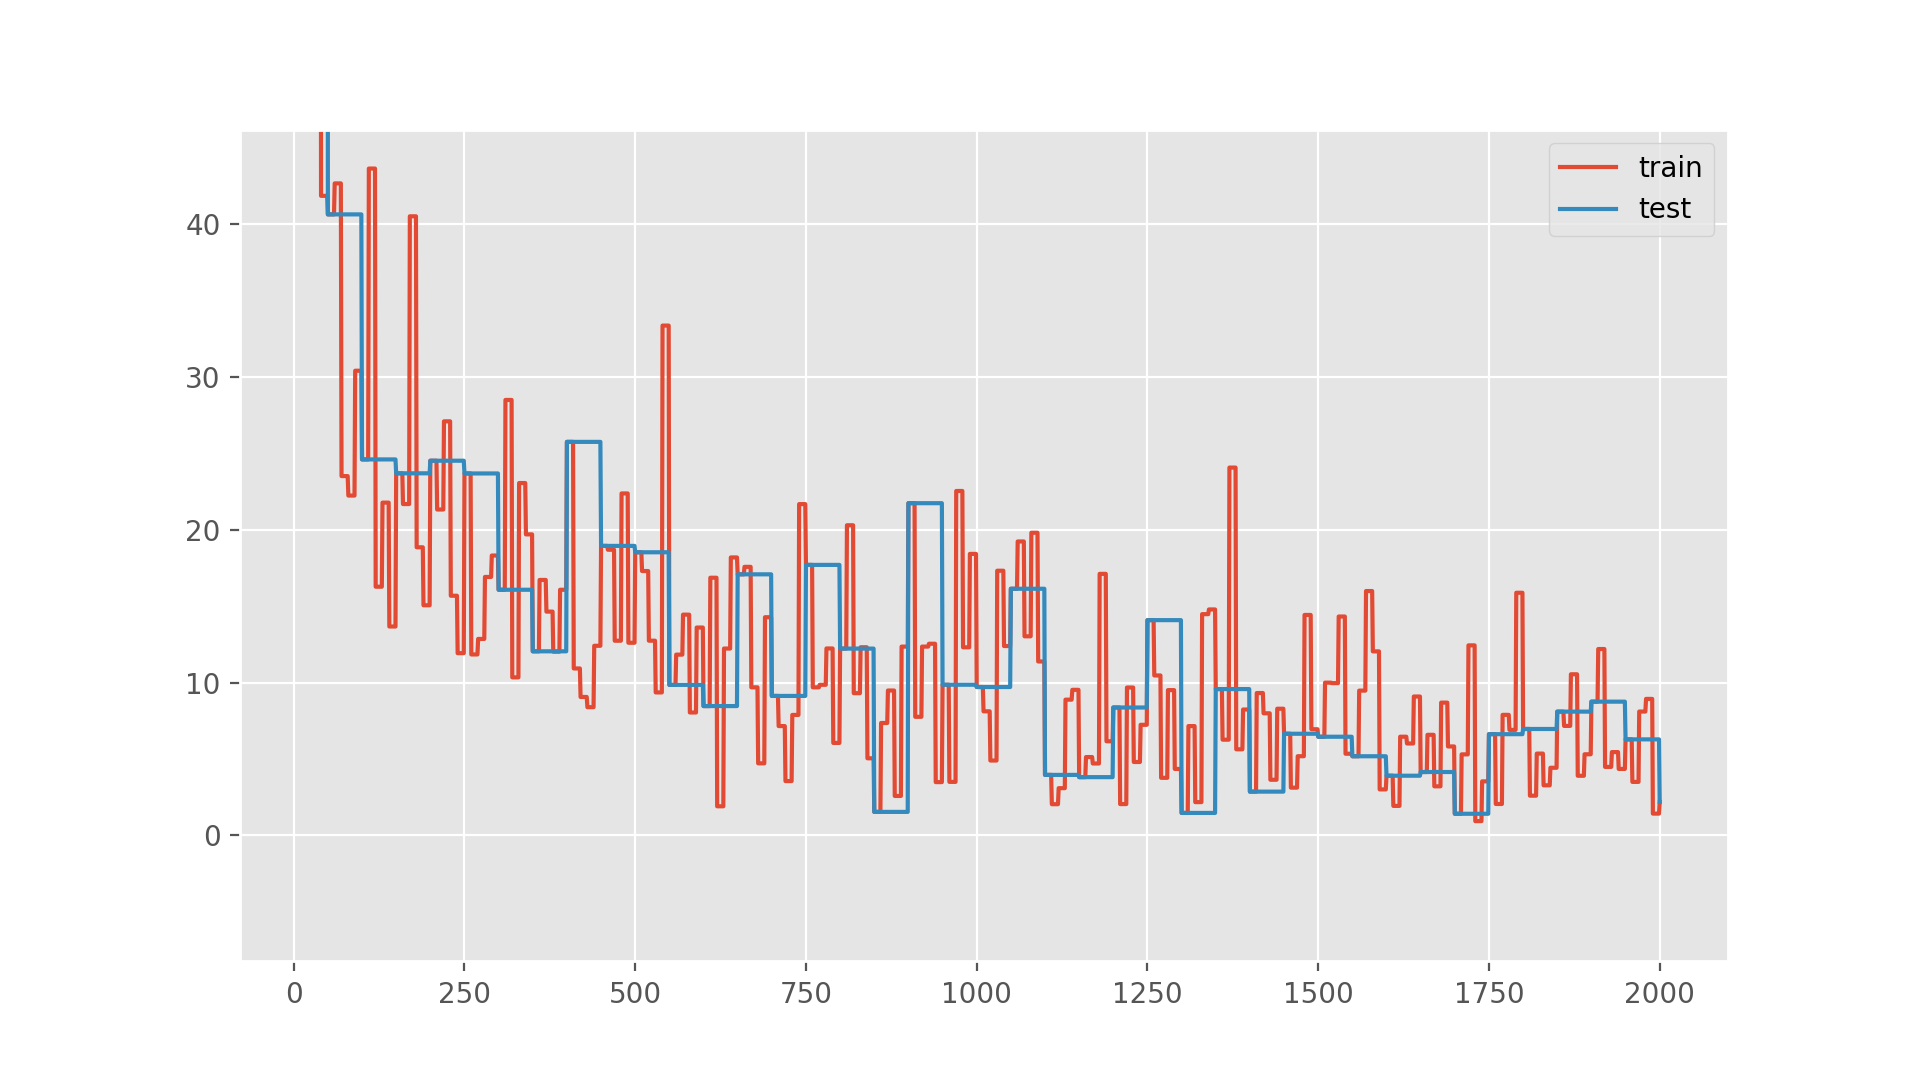

In [18]:
loss_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

<IPython.core.display.Javascript object>


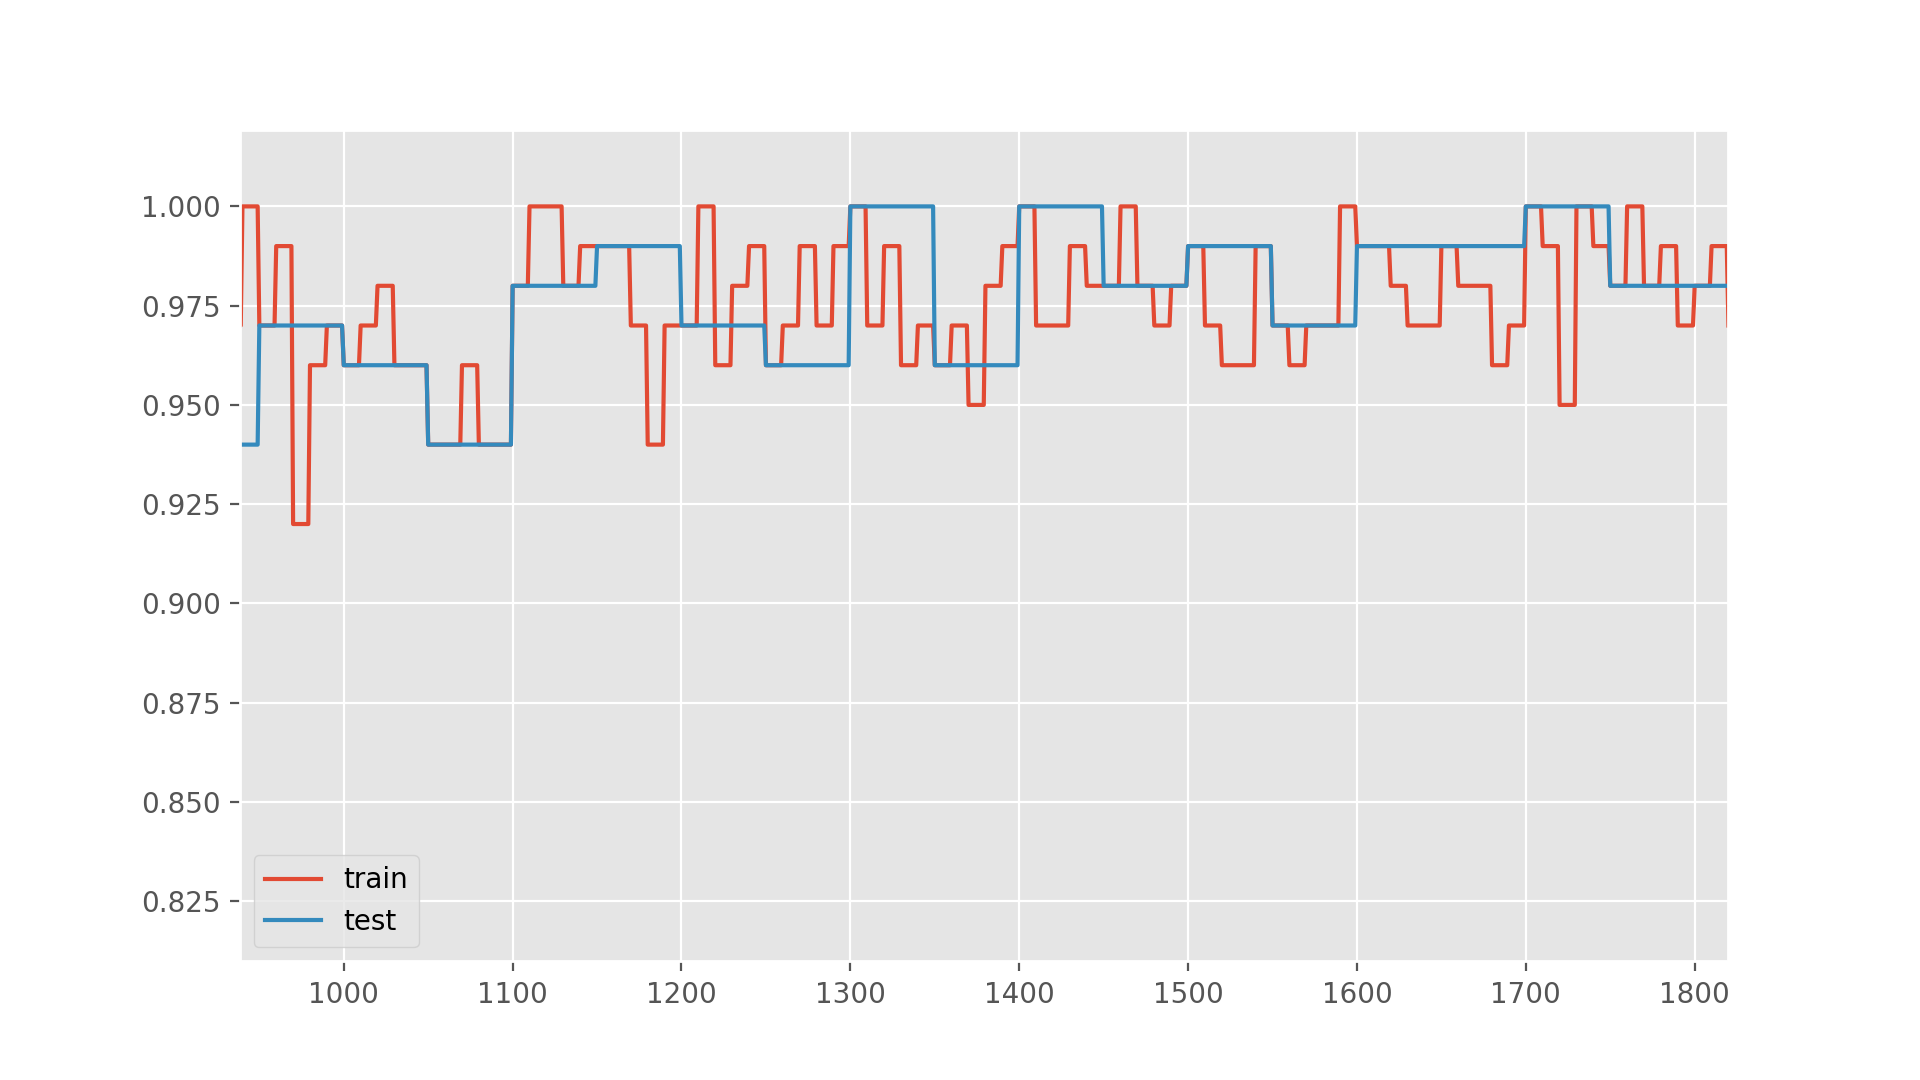

In [19]:
acc_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

## add lr decay to avoid noise

In [23]:
# decayed learning rate
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
step = tf.placeholder(tf.int32)
lr = 0.0001 + tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cross_entropy)

In [24]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, step: i}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        #datavis.append_training_curves_data(i, a, c)
        #datavis.append_data_histograms(i, w, b)
        #datavis.update_image1(im)
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, step: i})
        #datavis.append_test_curves_data(i, a, c)
        #datavis.update_image2(im)
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, step:i})

In [28]:
acc_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
for i in range(10000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.08 loss: 230.93112
0: ********* epoch 1 ********* test accuracy:0.1215 test loss: 230.23045
10: accuracy:0.53 loss: 163.01105
20: accuracy:0.7 loss: 84.68484
30: accuracy:0.79 loss: 73.49838
40: accuracy:0.86 loss: 40.42336
50: accuracy:0.88 loss: 39.452656
50: ********* epoch 1 ********* test accuracy:0.8681 test loss: 44.624805
60: accuracy:0.84 loss: 57.492626
70: accuracy:0.91 loss: 30.740694
80: accuracy:0.88 loss: 38.234253
90: accuracy:0.9 loss: 39.944176
100: accuracy:0.82 loss: 47.612576
100: ********* epoch 1 ********* test accuracy:0.8904 test loss: 37.37563
110: accuracy:0.89 loss: 42.68143
120: accuracy:0.91 loss: 27.721197
130: accuracy:0.91 loss: 30.161594
140: accuracy:0.92 loss: 27.81474
150: accuracy:0.91 loss: 30.670952
150: ********* epoch 1 ********* test accuracy:0.9314 test loss: 23.321026
160: accuracy:0.93 loss: 23.0324
170: accuracy:0.96 loss: 19.781094
180: accuracy:0.96 loss: 16.934109
190: accuracy:0.91 loss: 31.98613
200: accuracy:0.91 loss: 

1660: accuracy:0.97 loss: 10.192742
1670: accuracy:0.98 loss: 4.5549026
1680: accuracy:0.99 loss: 6.688713
1690: accuracy:1.0 loss: 1.5578809
1700: accuracy:0.99 loss: 2.1671257
1700: ********* epoch 4 ********* test accuracy:0.9734 test loss: 8.88291
1710: accuracy:0.99 loss: 2.8257687
1720: accuracy:1.0 loss: 1.8252677
1730: accuracy:0.98 loss: 5.151159
1740: accuracy:0.99 loss: 7.1580515
1750: accuracy:1.0 loss: 2.7973316
1750: ********* epoch 4 ********* test accuracy:0.9742 test loss: 8.514025
1760: accuracy:0.99 loss: 4.153045
1770: accuracy:1.0 loss: 2.1028817
1780: accuracy:0.96 loss: 11.922068
1790: accuracy:1.0 loss: 0.28901783
1800: accuracy:0.98 loss: 9.277686
1800: ********* epoch 4 ********* test accuracy:0.9762 test loss: 8.17684
1810: accuracy:0.97 loss: 8.966481
1820: accuracy:0.97 loss: 7.3936887
1830: accuracy:0.97 loss: 12.602995
1840: accuracy:0.97 loss: 8.674831
1850: accuracy:1.0 loss: 0.4129311
1850: ********* epoch 4 ********* test accuracy:0.975 test loss: 8.1

3300: ********* epoch 7 ********* test accuracy:0.979 test loss: 8.367983
3310: accuracy:0.98 loss: 4.636787
3320: accuracy:0.99 loss: 2.7994595
3330: accuracy:1.0 loss: 1.6752752
3340: accuracy:0.99 loss: 4.8136888
3350: accuracy:0.99 loss: 9.165252
3350: ********* epoch 7 ********* test accuracy:0.9772 test loss: 8.478296
3360: accuracy:1.0 loss: 0.70771354
3370: accuracy:1.0 loss: 1.1296619
3380: accuracy:1.0 loss: 0.62857246
3390: accuracy:0.99 loss: 1.7111716
3400: accuracy:0.99 loss: 1.4908099
3400: ********* epoch 7 ********* test accuracy:0.9787 test loss: 8.237344
3410: accuracy:0.99 loss: 1.8554224
3420: accuracy:0.99 loss: 5.430963
3430: accuracy:0.99 loss: 2.4482398
3440: accuracy:1.0 loss: 0.638258
3450: accuracy:1.0 loss: 2.046536
3450: ********* epoch 7 ********* test accuracy:0.9776 test loss: 8.742848
3460: accuracy:1.0 loss: 0.44732648
3470: accuracy:0.99 loss: 1.0626433
3480: accuracy:0.99 loss: 1.1714154
3490: accuracy:1.0 loss: 0.6526984
3500: accuracy:1.0 loss: 0.

4950: ********* epoch 10 ********* test accuracy:0.9799 test loss: 8.898664
4960: accuracy:1.0 loss: 0.26857197
4970: accuracy:1.0 loss: 0.18572907
4980: accuracy:1.0 loss: 0.033300336
4990: accuracy:1.0 loss: 0.27856314
5000: accuracy:1.0 loss: 0.29280156
5000: ********* epoch 10 ********* test accuracy:0.9802 test loss: 8.917746
5010: accuracy:1.0 loss: 0.25448236
5020: accuracy:1.0 loss: 0.08825478
5030: accuracy:1.0 loss: 0.044584155
5040: accuracy:1.0 loss: 0.11745198
5050: accuracy:1.0 loss: 0.12443671
5050: ********* epoch 10 ********* test accuracy:0.9799 test loss: 8.929627
5060: accuracy:1.0 loss: 0.42135882
5070: accuracy:1.0 loss: 0.045376822
5080: accuracy:1.0 loss: 0.12570833
5090: accuracy:1.0 loss: 0.19075355
5100: accuracy:1.0 loss: 0.10255143
5100: ********* epoch 10 ********* test accuracy:0.9808 test loss: 8.675656
5110: accuracy:1.0 loss: 0.45673564
5120: accuracy:1.0 loss: 0.015127654
5130: accuracy:0.99 loss: 2.0620685
5140: accuracy:1.0 loss: 0.078247786
5150: a

6550: ********* epoch 12 ********* test accuracy:0.9808 test loss: 9.611223
6560: accuracy:1.0 loss: 0.085753985
6570: accuracy:1.0 loss: 0.050191045
6580: accuracy:1.0 loss: 0.03582331
6590: accuracy:1.0 loss: 0.07634751
6600: accuracy:1.0 loss: 0.013835901
6600: ********* epoch 13 ********* test accuracy:0.9808 test loss: 9.7341795
6610: accuracy:1.0 loss: 0.021339737
6620: accuracy:1.0 loss: 0.039452773
6630: accuracy:1.0 loss: 0.09920518
6640: accuracy:1.0 loss: 0.032579802
6650: accuracy:1.0 loss: 0.013067163
6650: ********* epoch 13 ********* test accuracy:0.981 test loss: 9.719326
6660: accuracy:1.0 loss: 0.04777409
6670: accuracy:1.0 loss: 0.11191531
6680: accuracy:1.0 loss: 0.02957469
6690: accuracy:1.0 loss: 0.003865656
6700: accuracy:1.0 loss: 0.039209604
6700: ********* epoch 13 ********* test accuracy:0.9811 test loss: 9.94985
6710: accuracy:1.0 loss: 0.011803994
6720: accuracy:1.0 loss: 0.004158849
6730: accuracy:1.0 loss: 0.06986112
6740: accuracy:1.0 loss: 0.027457874
6

8150: ********* epoch 15 ********* test accuracy:0.981 test loss: 10.499458
8160: accuracy:1.0 loss: 0.030411584
8170: accuracy:1.0 loss: 0.010791853
8180: accuracy:1.0 loss: 0.22752911
8190: accuracy:1.0 loss: 0.002317148
8200: accuracy:1.0 loss: 0.007452941
8200: ********* epoch 15 ********* test accuracy:0.9803 test loss: 10.579731
8210: accuracy:1.0 loss: 0.024375975
8220: accuracy:1.0 loss: 0.017729772
8230: accuracy:1.0 loss: 0.008877099
8240: accuracy:1.0 loss: 0.026497887
8250: accuracy:1.0 loss: 0.0036942107
8250: ********* epoch 16 ********* test accuracy:0.9804 test loss: 10.682064
8260: accuracy:1.0 loss: 0.019974208
8270: accuracy:1.0 loss: 0.008648843
8280: accuracy:1.0 loss: 0.008881922
8290: accuracy:1.0 loss: 0.06655999
8300: accuracy:1.0 loss: 0.14554772
8300: ********* epoch 16 ********* test accuracy:0.9807 test loss: 10.901499
8310: accuracy:1.0 loss: 0.04283835
8320: accuracy:1.0 loss: 0.030373532
8330: accuracy:1.0 loss: 0.011563753
8340: accuracy:1.0 loss: 0.013

9750: ********* epoch 18 ********* test accuracy:0.981 test loss: 11.42821
9760: accuracy:1.0 loss: 0.023627637
9770: accuracy:1.0 loss: 0.008704426
9780: accuracy:1.0 loss: 0.040343747
9790: accuracy:1.0 loss: 0.15745002
9800: accuracy:1.0 loss: 0.0014793911
9800: ********* epoch 18 ********* test accuracy:0.9809 test loss: 11.528007
9810: accuracy:1.0 loss: 0.0086441375
9820: accuracy:1.0 loss: 0.031536564
9830: accuracy:1.0 loss: 0.01978255
9840: accuracy:1.0 loss: 0.0115182875
9850: accuracy:1.0 loss: 0.03223909
9850: ********* epoch 18 ********* test accuracy:0.9806 test loss: 11.554944
9860: accuracy:1.0 loss: 0.01603814
9870: accuracy:1.0 loss: 0.017031953
9880: accuracy:1.0 loss: 0.019005504
9890: accuracy:1.0 loss: 0.019135455
9900: accuracy:1.0 loss: 0.006506791
9900: ********* epoch 19 ********* test accuracy:0.981 test loss: 11.442119
9910: accuracy:1.0 loss: 0.014609689
9920: accuracy:1.0 loss: 0.02492342
9930: accuracy:1.0 loss: 0.004742169
9940: accuracy:1.0 loss: 0.0104

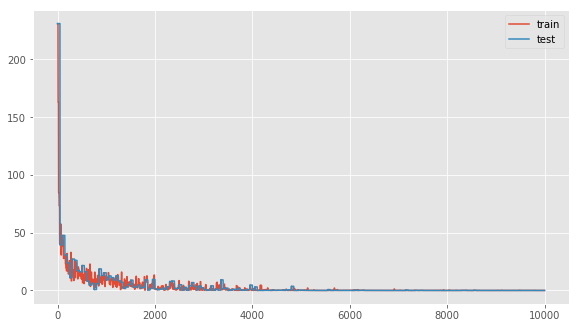

In [29]:
loss_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

<IPython.core.display.Javascript object>


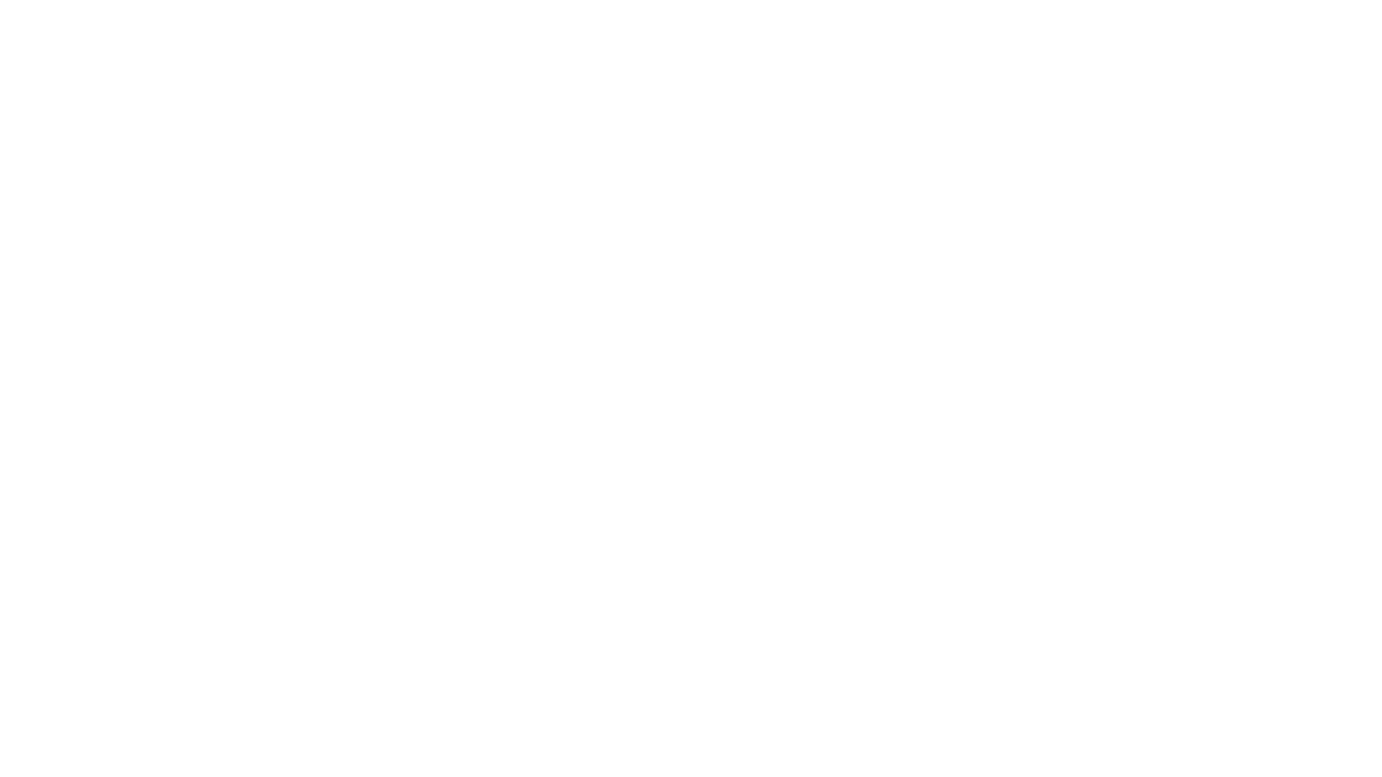

<IPython.core.display.Javascript object>


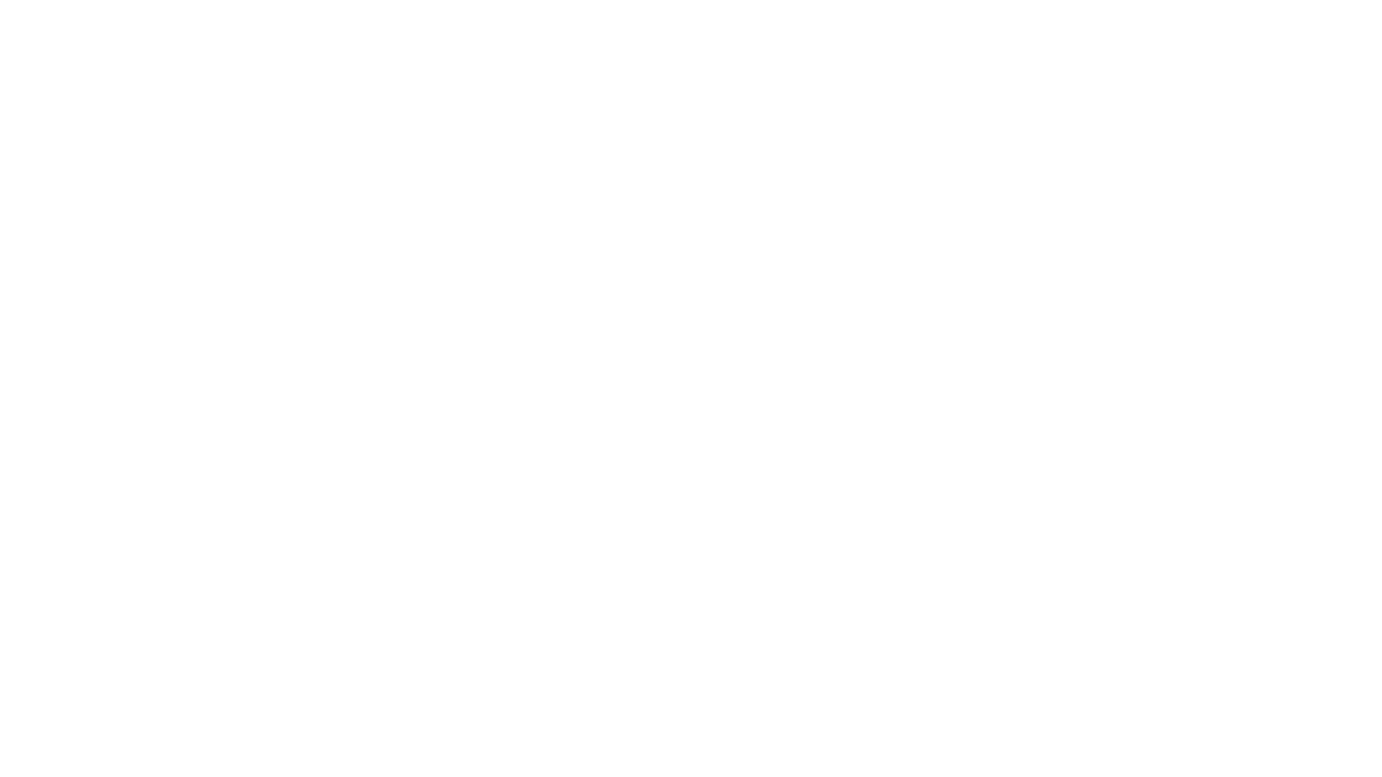

In [32]:
acc_plot_df.fillna(method='ffill').plot(linewidth=1.5, figsize=(19.20/2,10.80/2))

## add dropout to avoid overfitting

In [ ]:
# regularization - dropout

pkeep = tf.placeholder(tf.float32) #prob of neuron staying alive
# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [ ]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, step: i, pkeep=1.0}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, step: i, pkeep=1.0})
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, step:i, pkeep=0.75})

In [ ]:
acc_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
for i in range(10000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

## CNN initialisation

In [18]:
# number of output channels in each layer
K = 4
L = 8
M = 12
# Dense fully connected layer
N = 200

In [19]:
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1)) # 5,5 is filter size, 1 is num of input channels, K is num of output channels
B1 = tf.Variable(tf.ones([K])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M])/10)

#Dense layers

W4 = tf.Variable(tf.truncated_normal([7*7*M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1)) #last softmax layer
B5 = tf.Variable(tf.zeros([10])/10)

In [20]:
stride = 1 #output remains same 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1) #X: input image batch X[100, 28, 28, 1]
stride = 2 #output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3) # middle 2 elements of stride array indicates by how much to move the filter

ValueError: Shape must be rank 4 but is rank 2 for 'Conv2D' (op: 'Conv2D') with input shapes: [?,784], [5,5,1,4].

In [21]:
# shape of Y3 - Y3[100, 7, 7, 12]
# flatten all values for a fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])
# shape of YY - YY[100, 7*7*12]
Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

#rest of the training process remains same

## if we see overfitting with this CNN configuration, we make bigger filters and add dropout to dense layer

In [ ]:
# three convolutional layers with their channel counts, and a
# fully connected layer (the last layer has 10 softmax neurons)
K = 6  # first convolutional layer output depth
L = 12  # second convolutional layer output depth
M = 24  # third convolutional layer
N = 200  # fully connected layer

In [ ]:
Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
YY4 = tf.nn.dropout(Y4, pkeep)
Ylogits = tf.matmul(YY4, W5) + B5
Y = tf.nn.softmax(Ylogits)